# Working with APIs

We'll write a program that generates a visualization based on data it retrieves. It will use an API or *application programming interface* to automaticaly request information from a website and use that to generate a visualization.

## Index

* [Using an API](#using-an-api)
* [Requesting Data using an API call](#requesting-data-using-an-api-call)
* [Installing Requests](#installing-requests)
* [Processing an API Response](#processing-an-api-response)
* [Summarizing the Top Repositories](#summarizing-the-top-repositories)
* []

## Using an API

We'll write a program to download information about th emost-starred Python projects on GitHub, and we'll create a visualization with this information.

### Requesting Data Using an API Call

This is what an API call looks like, inside the link you can see the response:<br>
https://api.github.com/search/repositories?q=language:python+sort:stars 

- *https://api.github.com/* directs the request to GitHub's API.
- *search/repositories/* conducts the search through all the repositories.
- *?* means that later we are going to pass an argument.
- *q=* the equal lets us begin specifying a query.
- *language:python* we specified repositories that have Python as primary language.
- *+sort:stars* sorts the prohect by the number of stars.

### Installing Requests

We need the `Requests` package to easily request information from a website and examine the response.
```python
python -m pip install --user requests
```

### Processing an API Response


In [4]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

# Process resuts
print(data.keys())

Request succesfull! Code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


### Working with the Response Dictionary


In [6]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

print(f"Total repositories: {data['total_count']}")
print(f"Complete results: {not data['incomplete_results']}") 
# With incomplete_results we know if github was able to fully process the query

# Information about the repositories
repo_datas = data['items'] # items is a list with the number of repositories
print(f"Repositories returned: {len(repo_datas)}")

## Examine first repo
repo_data = repo_datas[0]
#print(f"\nKeys: {len(repo_data)}")
#for key in sorted(repo_data.keys()):
#    print(key)

# Extracting more detailed info:
print("\nSelected information about first repository:")
print(f"Name: {repo_data['name']}")
print(f"Owner: {repo_data['owner']['login']}")
print(f"Stars: {repo_data['stargazers_count']}")
print(f"Repository: {repo_data['html_url']}")
print(f"Created: {repo_data['created_at']}")
print(f"Updated: {repo_data['updated_at']}")
print(f"Description: {repo_data['description']}")

Request succesfull! Code: 200
Total repositories: 490
Complete results: True
Repositories returned: 30

Selected information about first repository:
Name: public-apis
Owner: public-apis
Stars: 293993
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2024-05-19T17:59:10Z
Description: A collective list of free APIs


### Summarizing the Top Repositories

In [1]:
import requests

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url) # Making the call

if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Convert the response to a dictionary
data = response.json()

print(f"Total repositories: {data['total_count']}")
print(f"Complete results: {not data['incomplete_results']}") 

# Information about the repositories
repo_datas = data['items']
print(f"Repositories returned: {len(repo_datas)}")

# Extracting more detailed info:
print("\n\tSelected information about each repository")
for repo_data in repo_datas:
    print("\nSelected information about first repository:")
    print(f"Name: {repo_data['name']}")
    print(f"Owner: {repo_data['owner']['login']}")
    print(f"Stars: {repo_data['stargazers_count']}")
    print(f"Repository: {repo_data['html_url']}")
    print(f"Created: {repo_data['created_at']}")
    print(f"Updated: {repo_data['updated_at']}")
    print(f"Description: {repo_data['description']}")

Request succesfull! Code: 200
Total repositories: 490
Complete results: True
Repositories returned: 30

	Selected information about each repository

Selected information about first repository:
Name: public-apis
Owner: public-apis
Stars: 294081
Repository: https://github.com/public-apis/public-apis
Created: 2016-03-20T23:49:42Z
Updated: 2024-05-20T17:15:55Z
Description: A collective list of free APIs

Selected information about first repository:
Name: system-design-primer
Owner: donnemartin
Stars: 257763
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2024-05-20T17:01:32Z
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Selected information about first repository:
Name: awesome-python
Owner: vinta
Stars: 207344
Repository: https://github.com/vinta/awesome-python
Created: 2014-06-27T21:00:06Z
Updated: 2024-05-20T17:16:19Z
Description: An opinionated list of aweso

## Visualizing Repositories Using Plotly


Request succesfull! Code: 200
Complete results: True


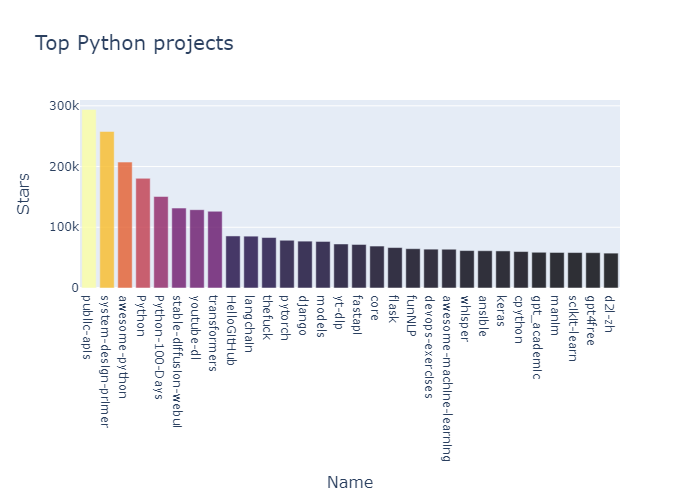

In [1]:
import requests
import plotly.express as px
from IPython.display import display, Image

## API call
url = "https://api.github.com/search/repositories?q=language:python+stars:>10000&sort=stars&order=desc"

response = requests.get(url)

# Checking Status Code
if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Process results
data = response.json()
print(f"Complete results: {not data['incomplete_results']}")

# Process information. Name to repo-link and hover with description.
repo_datas = data["items"]
repo_names = [f"<a href='{repo_data['html_url']}'>{repo_data['name']}</a>" for repo_data in repo_datas]
repo_stars = [repo_data["stargazers_count"] for repo_data in repo_datas]

# Hover Text
hover_texts = [f"{repo_data['owner']['login']} <br />{repo_data['description']}" for repo_data in repo_datas]

# Visualization
title = "Top Python projects"
labels = {"x":"Name","y":"Stars"}
fig = px.bar(x=repo_names, y=repo_stars, labels=labels, title=title, hover_name=hover_texts)

fig.update_layout(title_font_size=20, xaxis_title_font_size=16, yaxis_title_font_size=16)
fig.update_traces(marker_color=repo_stars, marker_colorscale="inferno", marker_opacity=0.8)

#fig.show()
Image(fig.to_image(format='png'))

## Hacker News API



In [20]:
import requests 
import json 

# API Call
url = "https://hacker-news.firebaseio.com/v0/item/31353677.json"
data = requests.get(url)

# Checking Status Code
if response.status_code == 200:
    print(f"Request succesfull! Code: {response.status_code}")
else:
    print(f"Something go wrong... Status code: {response.status_code}")

# Exploring structure
response_dict = data.json()
response_string = json.dumps(response_dict, indent=4)
print(response_string)

Request succesfull! Code: 200
{
    "by": "sohkamyung",
    "descendants": 307,
    "id": 31353677,
    "kids": [
        31354987,
        31354235,
        31354040,
        31358602,
        31354201,
        31354991,
        31354315,
        31353775,
        31353925,
        31354169,
        31354273,
        31354437,
        31356902,
        31358694,
        31363418,
        31353862,
        31357186,
        31356379,
        31356826,
        31355085,
        31369435,
        31357936,
        31354142,
        31354213,
        31356311,
        31357865,
        31353929,
        31364954,
        31354621,
        31356002,
        31356407,
        31355491,
        31359235,
        31356053,
        31354347,
        31355326,
        31354703,
        31353802
    ],
    "score": 786,
    "time": 1652361401,
    "title": "Astronomers reveal first image of the black hole at the heart of our galaxy",
    "type": "story",
    "url": "https://public.nrao.edu/news/